In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, './modules')
from Data_prep import Data
from Feature_engg import Feature_generator
from model_selector import model_container
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#define number of processors to use for parallel runs
num_procs = 4

#set verbose level for models
verbose_lvl = 0

#define input files
train_feature_file = r'C:\Users\Admin\Desktop\salary_predictions\data\train_features.csv'
train_target_file = r'C:\Users\Admin\Desktop\salary_predictions\data\train_salaries.csv'
test_file = r'C:\Users\Admin\Desktop\salary_predictions\data\test_features.csv'

#define variables
cat_cols = ['companyId', 'jobType', 'degree', 'major', 'industry']
num_cols = ['yearsExperience', 'milesFromMetropolis']
target_col = 'salary'
id_col = 'jobId'

#turn feature engineering on/off
engineer_features = True

In [3]:
data = Data(train_feature_file, train_target_file, test_file, cat_cols, num_cols, target_col, id_col)

In [4]:
data.test_df.shape

(1000000, 8)

In [5]:
if engineer_features:
    feature_generator = Feature_generator(data)
    feature_generator.add_group_stats()

In [6]:
models = model_container()

#create models -- hyperparameter tuning already done by hand for each model
models.add_model(LinearRegression())
models.add_model(RandomForestRegressor(n_estimators=200, n_jobs=num_procs, max_depth=10, min_samples_split=2, min_samples_leaf=9,
                                       max_features=0.7, verbose=verbose_lvl))
models.add_model(GradientBoostingRegressor(n_estimators=450, max_depth=3, max_features=1.0,min_samples_leaf=5,loss='ls', verbose=verbose_lvl))

In [7]:
models.cross_validate_score(data, k=2)
models.select_best_model()

In [8]:
models.fit_best_model(data.train_df[data.feature_cols], data.train_df[data.target_col])
models.predict_using_best_model(data.test_df[data.feature_cols])


Model Summaries:


 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) - MSE: 360.1274568747139

 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=0.7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=9,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) - MSE: 329.57629396175116

 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samp

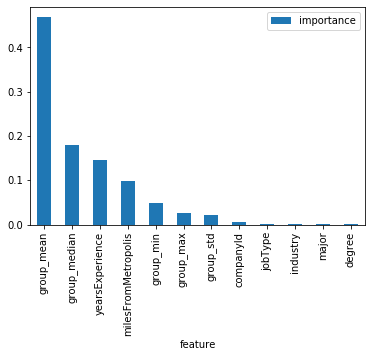

In [9]:
models.print_summary(data)